In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import descartes

import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

In [2]:
url = "NorwayMeteoDataCompleted.csv"
meteo = pd.read_csv(url)

In [3]:
meteo.head()

,Unnamed: 0,sourceId,latitude,longtitude,max(air_temperature P1D),max(relative_humidity P1D),max(wind_speed P1D),mean(air_temperature P1D),mean(relative_humidity P1D),mean(wind_speed P1D),sum(precipitation_amount P1D),day,month,year
0,0,SN100,61.134900,12.503900,NaN,NaN,NaN,NaN,NaN,NaN,0.4,1,1,2010
1,1,SN1135,58.990000,11.540800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2010
2,2,SN1151800,50.100278,14.255556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2010
3,3,SN15262,61.674000,8.368500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2010
4,4,SN1531000,45.473056,28.032222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2010


In [4]:
meteo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237629 entries, 0 to 237628
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0                     237629 non-null  int64  
 1   sourceId                       237629 non-null  object 
 2   latitude                       237629 non-null  float64
 3   longtitude                     237629 non-null  float64
 4   max(air_temperature P1D)       44766 non-null   float64
 5   max(relative_humidity P1D)     36965 non-null   float64
 6   max(wind_speed P1D)            35260 non-null   float64
 7   mean(air_temperature P1D)      63551 non-null   float64
 8   mean(relative_humidity P1D)    37411 non-null   float64
 9   mean(wind_speed P1D)           35260 non-null   float64
 10  sum(precipitation_amount P1D)  107937 non-null  float64
 11  day                            237629 non-null  int64  
 12  month                         

In [5]:
dropp = ['Unnamed: 0']
meteo.drop(dropp, inplace=True, axis=1)

In [6]:
meteo.head()

,sourceId,latitude,longtitude,max(air_temperature P1D),max(relative_humidity P1D),max(wind_speed P1D),mean(air_temperature P1D),mean(relative_humidity P1D),mean(wind_speed P1D),sum(precipitation_amount P1D),day,month,year
0,SN100,61.134900,12.503900,NaN,NaN,NaN,NaN,NaN,NaN,0.4,1,1,2010
1,SN1135,58.990000,11.540800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2010
2,SN1151800,50.100278,14.255556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2010
3,SN15262,61.674000,8.368500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2010
4,SN1531000,45.473056,28.032222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2010


In [7]:
meteo = meteo.dropna()

In [8]:
meteo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21799 entries, 34 to 235248
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   sourceId                       21799 non-null  object 
 1   latitude                       21799 non-null  float64
 2   longtitude                     21799 non-null  float64
 3   max(air_temperature P1D)       21799 non-null  float64
 4   max(relative_humidity P1D)     21799 non-null  float64
 5   max(wind_speed P1D)            21799 non-null  float64
 6   mean(air_temperature P1D)      21799 non-null  float64
 7   mean(relative_humidity P1D)    21799 non-null  float64
 8   mean(wind_speed P1D)           21799 non-null  float64
 9   sum(precipitation_amount P1D)  21799 non-null  float64
 10  day                            21799 non-null  int64  
 11  month                          21799 non-null  int64  
 12  year                           21799 non-nul

In [9]:
meteo.shape

(21799, 13)

In [10]:
meteo.head()

,sourceId,latitude,longtitude,max(air_temperature P1D),max(relative_humidity P1D),max(wind_speed P1D),mean(air_temperature P1D),mean(relative_humidity P1D),mean(wind_speed P1D),sum(precipitation_amount P1D),day,month,year
34,SN69100,63.4597,10.9305,-2.3,83.0,4.1,-8.50,79.0,3.0,0.00,1,1,2010
40,SN91380,69.3875,20.2823,-9.2,86.0,5.1,-11.75,71.0,2.6,0.30,1,1,2010
41,SN91740,69.7887,20.9553,-8.4,72.0,8.9,-10.90,67.0,6.9,0.00,1,1,2010
80,SN69100,63.4597,10.9305,-13.4,84.0,4.6,-15.15,82.0,3.6,0.00,2,1,2010
86,SN91380,69.3875,20.2823,-8.7,79.0,3.3,-12.35,73.0,2.3,0.15,2,1,2010


In [11]:
meteo.columns

Index(['sourceId', 'latitude', 'longtitude', 'max(air_temperature P1D)',
       'max(relative_humidity P1D)', 'max(wind_speed P1D)',
       'mean(air_temperature P1D)', 'mean(relative_humidity P1D)',
       'mean(wind_speed P1D)', 'sum(precipitation_amount P1D)', 'day', 'month',
       'year'],
      dtype='object')

In [12]:
newname = {'sourceId': 'sourceID', 'latitude': 'Latitude', 'longtitude': 'Longitude',
           'max(air_temperature P1D)': 'max_air_temp_perday', 'max(relative_humidity P1D)': 'max_rel_hum_perday', 
           'max(wind_speed P1D)': 'max_wind_speed_perday','mean(air_temperature P1D)': 'mean_air_temp_perday',
           'mean(relative_humidity P1D)': 'mean_rel_hum_perday', 'mean(wind_speed P1D)': 'mean_wind_speed_perday', 
           'sum(precipitation_amount P1D)': 'sum_precip_amount_perday', 'day': 'Day', 'month': 'Month', 'year': 'Year'}
meteo.rename(columns=newname, inplace=True)

In [13]:
meteo.head()

,sourceID,Latitude,Longitude,max_air_temp_perday,max_rel_hum_perday,max_wind_speed_perday,mean_air_temp_perday,mean_rel_hum_perday,mean_wind_speed_perday,sum_precip_amount_perday,Day,Month,Year
34,SN69100,63.4597,10.9305,-2.3,83.0,4.1,-8.50,79.0,3.0,0.00,1,1,2010
40,SN91380,69.3875,20.2823,-9.2,86.0,5.1,-11.75,71.0,2.6,0.30,1,1,2010
41,SN91740,69.7887,20.9553,-8.4,72.0,8.9,-10.90,67.0,6.9,0.00,1,1,2010
80,SN69100,63.4597,10.9305,-13.4,84.0,4.6,-15.15,82.0,3.6,0.00,2,1,2010
86,SN91380,69.3875,20.2823,-8.7,79.0,3.3,-12.35,73.0,2.3,0.15,2,1,2010


In [14]:
elem = meteo.sourceID.value_counts().count()
elem

7

In [26]:
c = meteo.groupby('sourceID')
c = c.sum()
c.head(10)

,Latitude,Longitude,max_air_temp_perday,max_rel_hum_perday,max_wind_speed_perday,mean_air_temp_perday,mean_rel_hum_perday,mean_wind_speed_perday,sum_precip_amount_perday,Day,Month,Year
sourceID,,,,,,,,,,,,
SN16400,153306.5184,22777.7496,18042.55,219911.0,14474.0,7036.80,181065.0,7249.2,2490.35,39022,16187,4988164
SN32240,108912.2775,16549.6071,22488.60,165805.0,5637.8,13671.25,134896.0,2270.7,4750.50,28884,12541,3698007
SN50110,83265.3360,8580.1500,17838.95,117632.0,3128.4,13704.00,101929.0,1498.3,10569.00,21719,9135,2781591
SN61630,269267.1475,35465.0000,33611.75,395591.0,18701.2,11339.30,326193.0,9311.7,8361.45,68056,28492,8717345
SN69100,276684.2920,47656.9800,43780.05,386254.0,33690.7,27725.90,325692.0,18607.5,9805.95,68565,28326,8787504
SN91380,291913.2125,85327.6361,28812.70,368636.0,17416.7,12386.00,305138.0,9578.6,5130.50,65946,27113,8478542
SN91740,224859.1914,67517.9766,21450.25,277441.0,24853.5,10743.80,234126.0,13289.9,6950.60,50671,20706,6488863


In [16]:
geometry = [Point(xy) for xy in zip(meteo.Longitude, meteo.Latitude)]

In [17]:
meteo['geometry'] = geometry

C:\Users\badar\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [18]:
crs = {'init': 'epsg:4326'}
meteo_locs = gpd.GeoDataFrame(meteo, crs=crs, geometry=geometry)

C:\Users\badar\AppData\Local\Programs\Python\Python310\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [24]:
meteo_locs.head()

,sourceID,Latitude,Longitude,max_air_temp_perday,max_rel_hum_perday,max_wind_speed_perday,mean_air_temp_perday,mean_rel_hum_perday,mean_wind_speed_perday,sum_precip_amount_perday,Day,Month,Year,geometry
34,SN69100,63.4597,10.9305,-2.3,83.0,4.1,-8.50,79.0,3.0,0.00,1,1,2010,POINT (10.93050 63.45970)
40,SN91380,69.3875,20.2823,-9.2,86.0,5.1,-11.75,71.0,2.6,0.30,1,1,2010,POINT (20.28230 69.38750)
41,SN91740,69.7887,20.9553,-8.4,72.0,8.9,-10.90,67.0,6.9,0.00,1,1,2010,POINT (20.95530 69.78870)
80,SN69100,63.4597,10.9305,-13.4,84.0,4.6,-15.15,82.0,3.6,0.00,2,1,2010,POINT (10.93050 63.45970)
86,SN91380,69.3875,20.2823,-8.7,79.0,3.3,-12.35,73.0,2.3,0.15,2,1,2010,POINT (20.28230 69.38750)


In [28]:
cols=["Year","Month","Day"]
meteo['Date'] = meteo[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

In [31]:
meteo['Date']=pd.to_datetime(meteo['Date'])

In [33]:
cols=["Year","Month","Day"]
meteo.drop(cols, inplace=True, axis=1)

In [35]:
coll=['Latitude', 'Longitude']
meteo.drop(coll, inplace=True, axis=1)

In [41]:
meteo = meteo[['sourceID', 'geometry', 'Date', 'max_air_temp_perday', 
               'max_rel_hum_perday', 'max_wind_speed_perday', 'mean_air_temp_perday',
               'mean_rel_hum_perday', 'mean_wind_speed_perday', 'sum_precip_amount_perday']]

In [42]:
meteo.head()

,sourceID,geometry,Date,max_air_temp_perday,max_rel_hum_perday,max_wind_speed_perday,mean_air_temp_perday,mean_rel_hum_perday,mean_wind_speed_perday,sum_precip_amount_perday
34,SN69100,POINT (10.93050 63.45970),2010-01-01,-2.3,83.0,4.1,-8.50,79.0,3.0,0.00
40,SN91380,POINT (20.28230 69.38750),2010-01-01,-9.2,86.0,5.1,-11.75,71.0,2.6,0.30
41,SN91740,POINT (20.95530 69.78870),2010-01-01,-8.4,72.0,8.9,-10.90,67.0,6.9,0.00
80,SN69100,POINT (10.93050 63.45970),2010-01-02,-13.4,84.0,4.6,-15.15,82.0,3.6,0.00
86,SN91380,POINT (20.28230 69.38750),2010-01-02,-8.7,79.0,3.3,-12.35,73.0,2.3,0.15


In [43]:
area_shp = gpd.read_file('ShapeFiles/norwayshp/NOR_adm2.shp')
street_map = gpd.read_file('ShapeFiles/norway-roads-shape/roads.shp')
railways = gpd.read_file('ShapeFiles/norway-railways-shape/railways.shp')
waterways = gpd.read_file('ShapeFiles/norway-waterways-shape/waterways.shp')

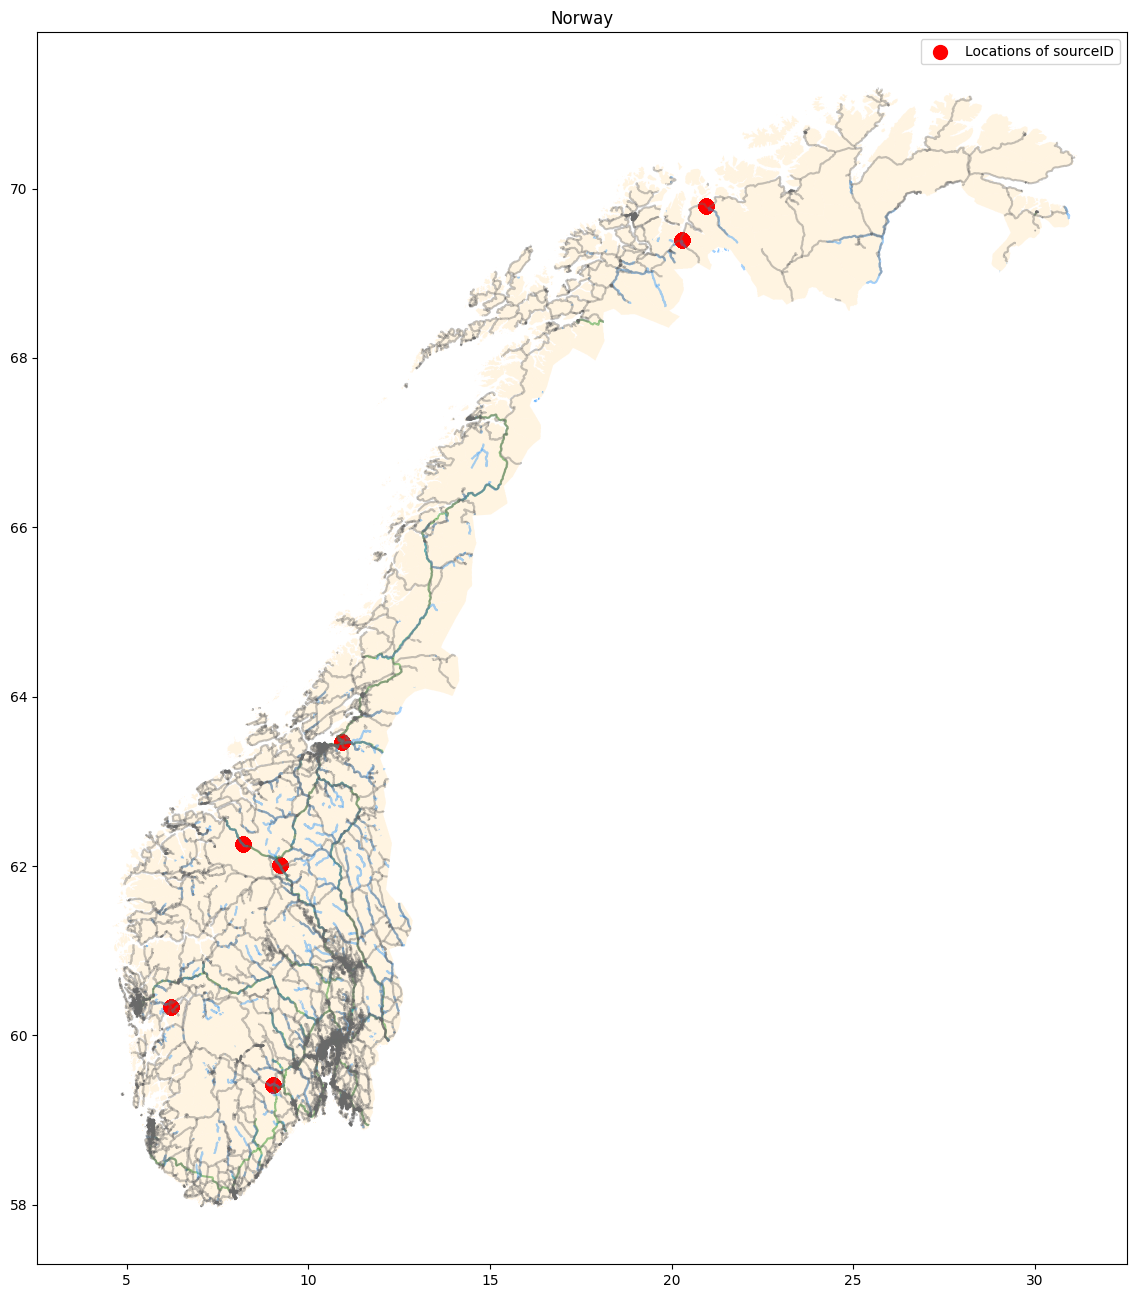

In [45]:
fig, ax = plt.subplots(figsize = (16,16))
railways.plot(color='green', ax=ax, alpha = 0.4)
waterways.plot(color='dodgerblue', ax=ax, alpha = 0.4)
street_map.plot(color='dimgray', ax=ax, alpha = 0.4)
area_shp.plot(color='moccasin', ax=ax, alpha = 0.4)
meteo_locs.geometry.plot(marker='o', color='red', markersize=100, ax=ax, label = 'Locations of sourceID')

plt.title('Norway')
plt.legend()

In [51]:
meteo['Date'].value_counts()

2016-01-01    7
2015-07-20    7
2015-08-09    7
2015-08-08    7
2015-08-07    7
             ..
2010-02-22    3
2010-02-23    3
2010-02-27    3
2010-02-28    3
2010-01-01    3
Name: Date, Length: 4382, dtype: int64

In [55]:
meteo.head()

,sourceID,geometry,Date,max_air_temp_perday,max_rel_hum_perday,max_wind_speed_perday,mean_air_temp_perday,mean_rel_hum_perday,mean_wind_speed_perday,sum_precip_amount_perday
34,SN69100,POINT (10.93050 63.45970),2010-01-01,-2.3,83.0,4.1,-8.50,79.0,3.0,0.00
40,SN91380,POINT (20.28230 69.38750),2010-01-01,-9.2,86.0,5.1,-11.75,71.0,2.6,0.30
41,SN91740,POINT (20.95530 69.78870),2010-01-01,-8.4,72.0,8.9,-10.90,67.0,6.9,0.00
80,SN69100,POINT (10.93050 63.45970),2010-01-02,-13.4,84.0,4.6,-15.15,82.0,3.6,0.00
86,SN91380,POINT (20.28230 69.38750),2010-01-02,-8.7,79.0,3.3,-12.35,73.0,2.3,0.15
